In [2]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from scipy.io import loadmat
from sklearn.metrics import classification_report, accuracy_score

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
def getFilesNew(basePath):
    dirs = glob(basePath+"/*/")
    #print(dirs)
    for _dir in dirs:
        files = glob(_dir+"*B?*.tiff")
        #print(files)
        yield files

In [4]:
S_sentinel_bands_forest = list(getFilesNew("/tmp/shared/2d_dataset2/forest"))

In [5]:
S_sentinel_bands_town = list(getFilesNew("/tmp/shared/2d_dataset2/town"))

In [6]:
S_sentinel_bands_water = list(getFilesNew("/tmp/shared/2d_dataset2/water"))

In [7]:
S_sentinel_bands_field = list(getFilesNew("/tmp/shared/2d_dataset2/field"))

In [8]:
l_f = []
for i in S_sentinel_bands_forest:
    s = []
    for j in i:
        with rio.open(j, 'r') as f:
            s.append(f.read(1))
    l_f.append(s)

/usr/local/lib/python3.8/dist-packages/rasterio/__init__.py:277: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [8]:
for idx, ll in enumerate(l_f):
    print("Index " + str(idx) + " len " + str(len(ll)))

Index 0 len 12
Index 1 len 12
Index 2 len 12
Index 3 len 12
Index 4 len 12
Index 5 len 12
Index 6 len 12
Index 7 len 12
Index 8 len 12
Index 9 len 12
Index 10 len 12
Index 11 len 12
Index 12 len 12
Index 13 len 12
Index 14 len 12
Index 15 len 12
Index 16 len 12
Index 17 len 12
Index 18 len 12
Index 19 len 12
Index 20 len 12
Index 21 len 12
Index 22 len 12
Index 23 len 12
Index 24 len 12
Index 25 len 12
Index 26 len 12
Index 27 len 12
Index 28 len 12
Index 29 len 12
Index 30 len 12
Index 31 len 12
Index 32 len 12
Index 33 len 12
Index 34 len 12
Index 35 len 12
Index 36 len 12
Index 37 len 12
Index 38 len 12
Index 39 len 12
Index 40 len 12
Index 41 len 12
Index 42 len 12
Index 43 len 12
Index 44 len 12
Index 45 len 12
Index 46 len 12
Index 47 len 12
Index 48 len 12
Index 49 len 12
Index 50 len 12
Index 51 len 12
Index 52 len 12
Index 53 len 12
Index 54 len 12
Index 55 len 12
Index 56 len 12
Index 57 len 12
Index 58 len 12
Index 59 len 12
Index 60 len 12
Index 61 len 12
Index 62 len 12
In

In [9]:
S_sentinel_bands_sands = list(getFilesNew("/tmp/shared/2d_dataset/sands"))

In [10]:
def getFilesArrayNew(paths):
    l = []
    for i in paths:
        s = []
        for j in i:
            with rio.open(j, 'r') as f:
                arr = f.read(1)
                arr = arr[0:96,0:96]
                s.append(arr)
        if len(s) == 12:
            l.append(s)
    arr_st_new = np.stack(l)
    return  arr_st_new

In [11]:
forest_st = getFilesArrayNew(S_sentinel_bands_forest);

In [12]:
town_st = getFilesArrayNew(S_sentinel_bands_town);

ValueError: need at least one array to stack

In [ ]:
water_st = getFilesArrayNew(S_sentinel_bands_water);

In [ ]:
field_st = getFilesArrayNew(S_sentinel_bands_field);

In [ ]:
sands_st = getFilesArrayNew(S_sentinel_bands_sands);

In [16]:
town_st.shape

(89, 12, 96, 96)

In [17]:
town_st2 = np.moveaxis(town_st, 1, -1)

In [18]:
water_st2 = np.moveaxis(water_st, 1, -1)

In [19]:
field_st2 = np.moveaxis(field_st, 1, -1)

In [20]:
sands_st2 = np.moveaxis(sands_st, 1, -1)

In [21]:
forest_st2 = np.moveaxis(forest_st, 1, -1)

In [22]:
town_st3 = town_st2.reshape(-1, 32,32,12)

In [23]:
water_st3 = water_st2.reshape(-1, 32,32,12)

In [24]:
field_st3 = field_st2.reshape(-1, 32,32,12)

In [25]:
sands_st3 = sands_st2.reshape(-1, 32,32,12)

In [26]:
forest_st3 = forest_st2.reshape(-1, 32,32,12)

In [27]:
x_data = np.append(field_st3, sands_st3,axis=0)
x_data = np.append(x_data, town_st3,axis=0)
x_data = np.append(x_data, water_st3, axis=0)
x_data = np.append(x_data, forest_st3, axis=0)
x_data.shape

(4311, 32, 32, 12)

In [28]:
y_town = np.full((town_st3.shape[0],town_st3.shape[1],town_st3.shape[2]),3)
y_water = np.full((water_st3.shape[0],water_st3.shape[1],water_st3.shape[2]),4)
y_field = np.full((field_st3.shape[0],field_st3.shape[1],field_st3.shape[2]),1)
y_sands = np.full((sands_st3.shape[0],sands_st3.shape[1],sands_st3.shape[2]),2)
y_forest = np.full((forest_st3.shape[0],forest_st3.shape[1],forest_st3.shape[2]),5)

In [29]:
y_data = np.append(y_field, y_sands,axis=0)
y_data = np.append(y_data, y_town, axis=0)
y_data = np.append(y_data, y_water, axis=0)
y_data = np.append(y_data, y_forest, axis=0)

In [30]:
y_data.shape

(4311, 32, 32)

In [31]:
t_sst = t_st.reshape(-1, 20,20,12)

NameError: name 't_st' is not defined

In [1]:
#Let's import some important Libraries
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.utils import np_utils

In [33]:
y_data_train_cate = np_utils.to_categorical(y_data)

In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
from keras.layers import *
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

In [36]:
model_new = tf.keras.models.Sequential([
    Conv2D(32,(3,3),padding='same',input_shape=(32,32,12)),
    Conv2D(32,(3,3),padding='same',input_shape=(32,32,12)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3), padding='same'),
    Activation('relu'),
    #We are naming this layer, as we will extract features from it in future, JUST WAIT !!!
    MaxPooling2D(pool_size=(2,2),name='feature_layer'),
    UpSampling2D((4,4)),
    Conv2D(6,(1,1),padding='same'),
    Activation('relu'),
    # model.add(Flatten())
    # model.add(Dense(24))
    # model.add(Activation('relu'))
    # model.add(Dropout(0.5))
    # model.add(Dense(6))
    Dense(6),
    Reshape((-1,6)),
    Activation('softmax'),
])

2022-11-23 18:43:07.196333: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (34)
2022-11-23 18:43:07.196406: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (acdaaf78663d): /proc/driver/nvidia/version does not exist
2022-11-23 18:43:07.196637: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
model_new.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [38]:
model_new.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        3488      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 16, 16, 64)        0         
                                                        

In [43]:
inputs = Input(shape=(32,32,12))
x = Conv2D(32, 3,strides=2, padding="same")(inputs)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = SpatialDropout2D(0.5)(x)

previous_block_activation = x

for filters in [64, 128, 256]:
    x = Activation("relu")(x)
    x = SeparableConv2D(filters, 3, padding="same")(x)
    x = BatchNormalization()(x)

    x = Activation("relu")(x)
    x = SeparableConv2D(filters, 3, padding="same")(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D(3, strides=2, padding="same")(x)

    residual = Conv2D(filters, 3, strides=2, padding="same")(previous_block_activation)
    x = add([x, residual])
    #x = Dropout(0.3)(x)
    previous_block_activation = x

for filters in [256, 128, 64, 32]:
    x = Activation("relu")(x)
    x = Conv2DTranspose(filters, 3, padding="same")(x)
    x = BatchNormalization()(x)

    x = Activation("relu")(x)
    x = Conv2DTranspose(filters, 3, padding="same")(x)
    x = BatchNormalization()(x)

    x = UpSampling2D(2)(x)

    residual = UpSampling2D(2)(previous_block_activation)
    residual = Conv2D(filters, 3, padding="same")(residual)
    x = add([x, residual])  # Add back residual
    #x = Dropout(0.3)(x)
    previous_block_activation = x

outputs = Conv2D(6, 3, activation="softmax", padding="same")(x)
#outputs = Reshape((20,20,6))(outputs)
outputs = Activation("relu")(outputs)
#outputs = Reshape((10,10,6))(outputs)

In [44]:
previous_block_activation.shape

TensorShape([None, 32, 32, 32])

In [45]:
model = Model(inputs, outputs)

In [46]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy','MeanSquaredError'])

In [47]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 12)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_4 (Conv2D)              (None, 16, 16, 32)   3488        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 16, 16, 32)  128         ['conv2d_4[0][0]']               
 alization)                                                                                       
                                                                                              

In [191]:
x_data_norm = tf.keras.utils.normalize(x_data)

In [39]:
x_train = x_data

In [40]:
std = np.std(x_train)
mean= np.mean(x_train)

np.add(x_train, -mean, out=x_train, casting="unsafe")
#x_train/=std
np.divide(x_train, std, out=x_train, casting="unsafe")

array([[[[5, 0, 5, ..., 0, 5, 6],
         [5, 0, 5, ..., 0, 5, 6],
         [5, 0, 5, ..., 0, 5, 6],
         ...,
         [6, 0, 5, ..., 1, 5, 0],
         [6, 0, 5, ..., 1, 5, 0],
         [6, 0, 5, ..., 1, 5, 6]],

        [[5, 0, 5, ..., 1, 5, 6],
         [5, 0, 5, ..., 1, 5, 6],
         [5, 0, 5, ..., 1, 5, 6],
         ...,
         [6, 0, 5, ..., 0, 5, 0],
         [6, 0, 5, ..., 0, 5, 0],
         [6, 0, 5, ..., 0, 5, 0]],

        [[6, 0, 5, ..., 0, 5, 0],
         [6, 0, 5, ..., 0, 5, 0],
         [6, 0, 5, ..., 0, 5, 0],
         ...,
         [6, 0, 5, ..., 0, 5, 0],
         [6, 0, 5, ..., 0, 5, 0],
         [6, 0, 5, ..., 0, 5, 0]],

        ...,

        [[6, 0, 5, ..., 0, 5, 0],
         [6, 1, 5, ..., 0, 5, 0],
         [6, 1, 5, ..., 0, 5, 0],
         ...,
         [6, 0, 5, ..., 0, 5, 6],
         [5, 0, 5, ..., 0, 5, 6],
         [6, 0, 5, ..., 0, 5, 6]],

        [[6, 0, 5, ..., 0, 5, 6],
         [6, 0, 5, ..., 0, 5, 6],
         [6, 0, 5, ..., 1, 5, 6],
    

In [41]:
y_data_train_cate2 = y_data_train_cate.reshape(-1, 1024, 6)

In [42]:
history2 = model_new.fit(x_train, y_data_train_cate2, epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
108/108 [==============================] - 6s 47ms/step - loss: 0.8502 - accuracy: 0.7025 - val_loss: 5.5051 - val_accuracy: 0.0029
Epoch 2/20
108/108 [==============================] - 5s 42ms/step - loss: 0.5176 - accuracy: 0.7891 - val_loss: 6.3130 - val_accuracy: 0.0666
Epoch 3/20
108/108 [==============================] - 4s 41ms/step - loss: 0.4108 - accuracy: 0.8351 - val_loss: 9.1064 - val_accuracy: 0.0114
Epoch 4/20
108/108 [==============================] - 5s 46ms/step - loss: 0.3396 - accuracy: 0.8573 - val_loss: 7.5257 - val_accuracy: 0.0541
Epoch 5/20
108/108 [==============================] - 5s 48ms/step - loss: 0.2918 - accuracy: 0.8762 - val_loss: 10.8044 - val_accuracy: 0.0169
Epoch 6/20
108/108 [==============================] - 5s 43ms/step - loss: 0.2540 - accuracy: 0.8900 - val_loss: 8.6235 - val_accuracy: 0.0943
Epoch 7/20
108/108 [==============================] - 5s 43ms/step - loss: 0.2247 - accuracy: 0.9064 - val_loss: 8.8654 - val_accuracy: 0.036

In [203]:
history = model.fit(x_train,y_data_train_cate,epochs=8,batch_size=64,validation_split=0.2)

Epoch 1/8
54/54 [==============================] - 29s 480ms/step - loss: 6.5238 - accuracy: 0.5832 - mean_squared_error: 0.1376 - val_loss: 16.1181 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.3333
Epoch 2/8
54/54 [==============================] - 25s 463ms/step - loss: 5.2847 - accuracy: 0.6721 - mean_squared_error: 0.1093 - val_loss: 16.1181 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.3333
Epoch 3/8
54/54 [==============================] - 24s 446ms/step - loss: 5.2141 - accuracy: 0.6765 - mean_squared_error: 0.1078 - val_loss: 16.1181 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.3333
Epoch 4/8
54/54 [==============================] - 24s 447ms/step - loss: 5.2658 - accuracy: 0.6733 - mean_squared_error: 0.1089 - val_loss: 16.1181 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 0.3333
Epoch 5/8
54/54 [==============================] - 24s 442ms/step - loss: 5.2539 - accuracy: 0.6740 - mean_squared_error: 0.1087 - val_loss: 16.1181 - val_accuracy:

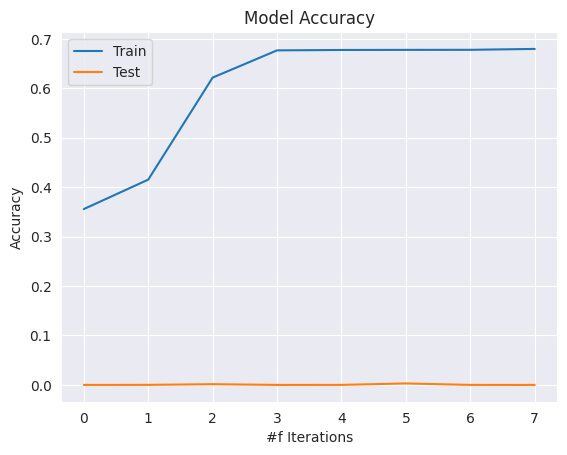

In [93]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('#f Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Check

In [48]:
from glob import glob
S_sentinel_bands = glob("/tmp/shared/test_images2/*B?*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands

['/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
 '/tmp/shared/test_images2/2022-08-24-00_00_2022-08-24-23_59_Sentinel-

In [49]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

In [50]:
arr_st = np.stack(l)

In [51]:
x = np.moveaxis(arr_st, 0, -1)
x.shape

(733, 1250, 12)

In [52]:
x1_v = x.shape[0]%32
x1_h = x.shape[1]%32
res1 = x.shape[0]-x1_v
res2 = x.shape[1]-x1_h
xx = x[0:(x.shape[0]-x1_v),0:(x.shape[1]-x1_h),:]

In [53]:
x = x[0:720,0:1200,:]
x.shape

(720, 1200, 12)

In [54]:
x_r = x.reshape(-1,20,20,12)
x_r.shape

(2160, 20, 20, 12)

In [55]:
x_rr = xx.reshape(-1, 32,32,12)

In [56]:
y_data_test = loadmat('/tmp/shared/test_images2/labeling.mat')['data']
y_data_test.shape

(733, 1250)

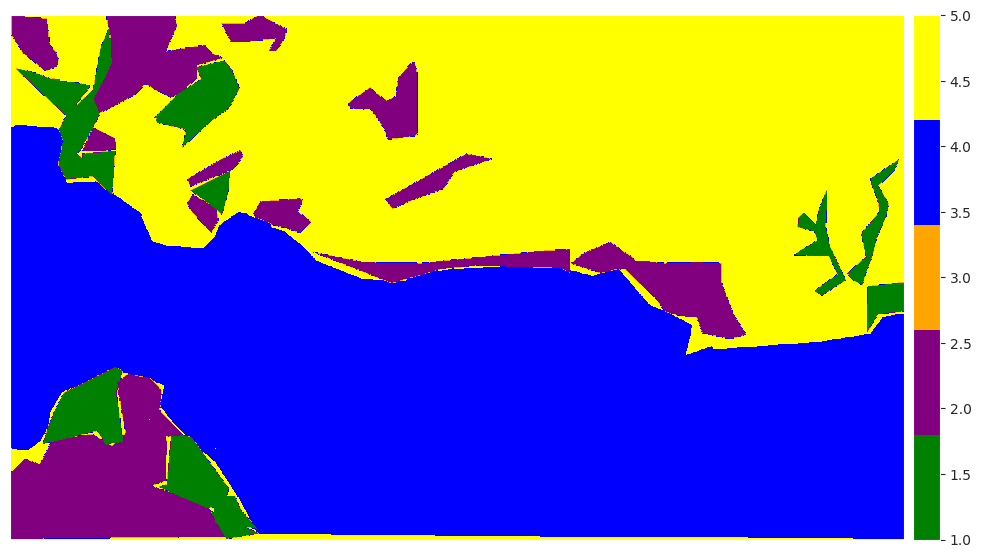

<AxesSubplot:>

In [57]:
ep.plot_bands(y_data_test,
              cmap=ListedColormap(['green', 'purple', 'orange', 'blue', 'yellow']))

In [59]:
x_r_norm =  tf.keras.utils.normalize(x_rr)

In [60]:
x_r_2 = x_rr

In [61]:
std2 = np.std(x_r_2)
mean2 = np.mean(x_r_2)

np.divide(x_r_2, mean2, out=x_r_2, casting="unsafe")
#x_train/=std
np.divide(x_r_2, std2, out=x_r_2, casting="unsafe")

array([[[[ 3.344135 ,  3.5630965,  5.712898 , ..., 19.288494 ,
          10.042359 , 33.132812 ],
         [ 3.2346547,  4.0209246,  6.1408677, ..., 19.52736  ,
          10.599714 , 30.236555 ],
         [ 3.2346547,  4.2996025,  6.170726 , ..., 19.746323 ,
          11.485512 , 28.28581  ],
         ...,
         [ 4.5285163,  5.573559 ,  7.4247766, ..., 20.333536 ,
          14.9689865, 23.88668  ],
         [ 4.4090834,  6.419545 ,  8.489724 , ..., 22.373857 ,
          15.87469  , 26.235535 ],
         [ 4.269744 ,  6.369782 ,  9.066986 , ..., 22.24447  ,
          15.785115 , 28.076803 ]],

        [[ 4.0706882,  8.68878  , 10.569857 , ..., 19.069532 ,
          14.461394 , 26.743128 ],
         [ 3.8417745,  6.170726 ,  7.9821324, ..., 17.23822  ,
          13.028193 , 22.642582 ],
         [ 3.7024357,  6.648459 ,  8.051802 , ..., 17.397465 ,
          12.08268  , 24.732668 ],
         ...,
         [ 4.0209246,  4.5882335,  6.170726 , ..., 20.303679 ,
          12.868949 , 22.

In [107]:
prediction = model.predict(x_r_2,batch_size=128)

7/7 [==============================] - 2s 204ms/step


In [83]:
prediction.shape

(858, 32, 32, 6)

In [108]:
pred_cat = np.argmax(prediction,axis=3)
pred_cat.shape

(858, 32, 32)

In [109]:
pred_pxl = pred_cat.reshape(res1,res2)

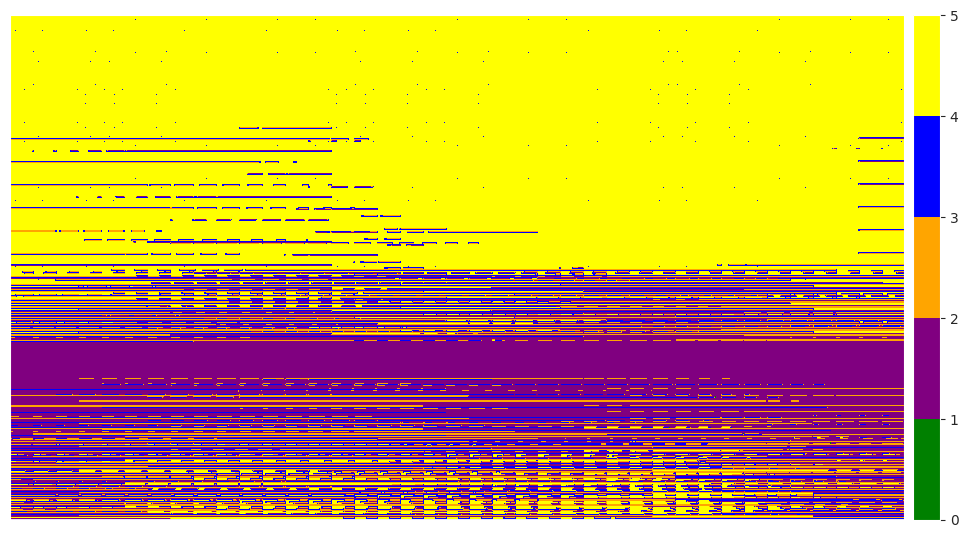

<AxesSubplot:>

In [110]:
ep.plot_bands(pred_pxl,
              cmap=ListedColormap(['green', 'purple', 'orange', 'blue', 'yellow']))

In [190]:
pred_vec = pred_cat.reshape(-1)
pred_vec.shape

(864000,)

In [191]:
y_data_test2 = y_data_test[0:720,0:1200].reshape(-1)
y_data_test2.shape

(864000,)

In [192]:
accuracy_score(y_data_test2, pred_vec)

0.21680555555555556

In [62]:
prediction2 = model_new.predict(x_r_2,batch_size=32)

27/27 [==============================] - 0s 9ms/step


In [63]:
pred_cat2 = np.argmax(prediction2,axis=2)
pred_cat2.shape

(858, 1024)

In [64]:
pred_pxl2 = pred_cat2.reshape(res1, res2)

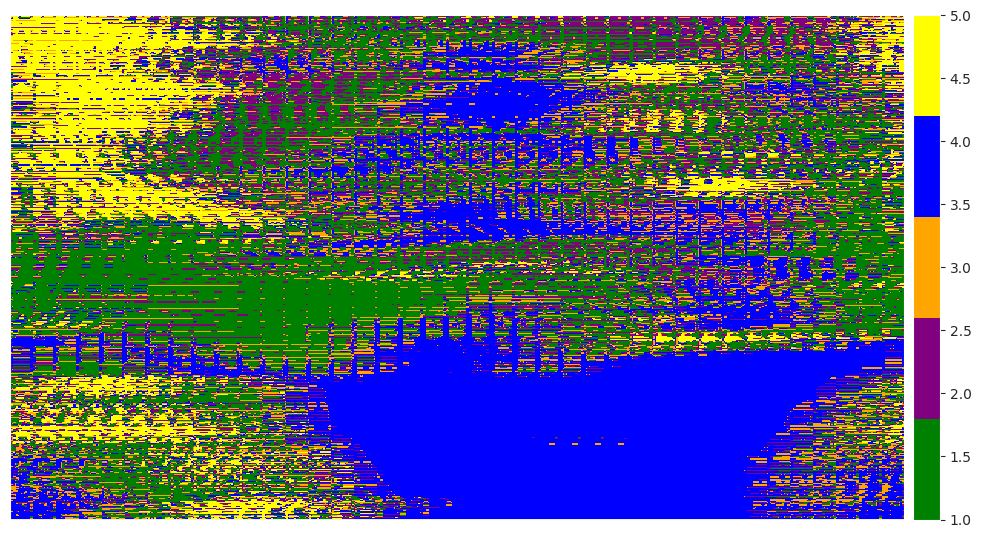

<AxesSubplot:>

In [65]:
ep.plot_bands(pred_pxl2,
              cmap=ListedColormap(['green', 'purple', 'orange', 'blue', 'yellow']))

In [66]:
pred_vec2 = pred_cat2.reshape(-1)
pred_vec2.shape

(878592,)

In [68]:
y_data_test3 = y_data_test[0:res1,0:res2].reshape(-1)
y_data_test3.shape

(878592,)

In [70]:
accuracy_score(y_data_test3, pred_vec2)

0.32276756446678323